VNA manual says calibration can interpolate. This notbook tests that. 

I have calibrated twice at different resolutions and saved as the files : `SOLT300M-320M4001pt_4_11_25` and `SOLT250M-1050M4501pt_4_14_25`. Both calibrations use 2.5kHz IF BW and 0dBm level. avg = 4

Scans are with big vivaldi on port 2 and RF space log periodic on port 1 in RC with door closed.


In [1]:
#Set up connection, set up sweep, take test sweep, plot 

import time
from libreVNA import libreVNA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)


# Create the control instance
vna = libreVNA('localhost', 19542)

# Quick connection check (should print "LibreVNA-GUI")
print(vna.query("*IDN?"))

# Make sure we are connecting to a device (just to be sure, with default settings the LibreVNA-GUI auto-connects)
vna.cmd(":DEV:CONN")

dev = vna.query(":DEV:CONN?")
if dev == "Not connected":
    print("Not connected to any device, aborting")
    exit(-1)
else:
    print("Connected to "+dev)


LibreVNA-GUI
Connected to 207635B23750


In [5]:
#High res calibration using `SOLT300M-320M4001pt_4_11_25`
print("Setting up the sweep...")
vna.cmd(":DEV:MODE VNA")
vna.cmd(":VNA:SWEEP FREQUENCY")
vna.cmd(":VNA:STIM:LVL 0")
vna.cmd(":VNA:ACQ:IFBW 2500") #IF bandwidth. Basically RBW
vna.cmd(":VNA:ACQ:AVG 4")
vna.cmd(":VNA:ACQ:POINTS 4001") #data points. max = 4501
vna.cmd(":VNA:FREQuency:START "+ str(int(300*1e6)))


# wait for the sweep to finish
print("Waiting for the sweep to finish...")
while vna.query(":VNA:ACQ:FIN?") == "FALSE":
    time.sleep(0.1)

S11 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S11"))
freqs = [data[0]/1e6 for data in S11] #MHz
s11_highResCal = [data[1] for data in S11]
S22 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S22"))
s22_highResCal = [data[1] for data in S22]
S21 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S21"))
s21_highResCal = [data[1] for data in S22]


Setting up the sweep...
Waiting for the sweep to finish...


In [6]:
#Low res calibration using `SOLT250M-1050M4501pt_4_14_25`
print("Setting up the sweep...")
vna.cmd(":DEV:MODE VNA")
vna.cmd(":VNA:SWEEP FREQUENCY")
vna.cmd(":VNA:STIM:LVL 0")
vna.cmd(":VNA:ACQ:IFBW 2500") #IF bandwidth. Basically RBW
vna.cmd(":VNA:ACQ:AVG 4")
vna.cmd(":VNA:ACQ:POINTS 4001") #data points. max = 4501
vna.cmd(":VNA:FREQuency:START "+ str(int(300*1e6)))
vna.cmd(":VNA:FREQuency:STOP " + str(int(320*1e6)))

# wait for the sweep to finish
print("Waiting for the sweep to finish...")
while vna.query(":VNA:ACQ:FIN?") == "FALSE":
    time.sleep(0.1)

S11 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S11"))
freqsLR = [data[0]/1e6 for data in S11] #MHz
s11_lowResCal = [data[1] for data in S11]
S22 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S22"))
s22_lowResCal = [data[1] for data in S22]
S21 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S21"))
s21_lowResCal = [data[1] for data in S22]

Setting up the sweep...
Waiting for the sweep to finish...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


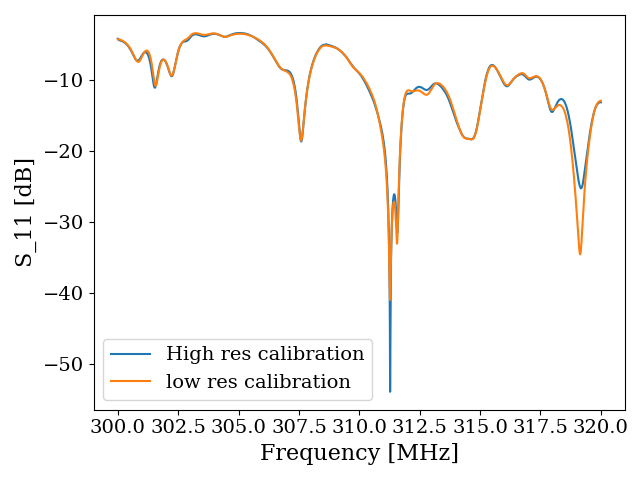

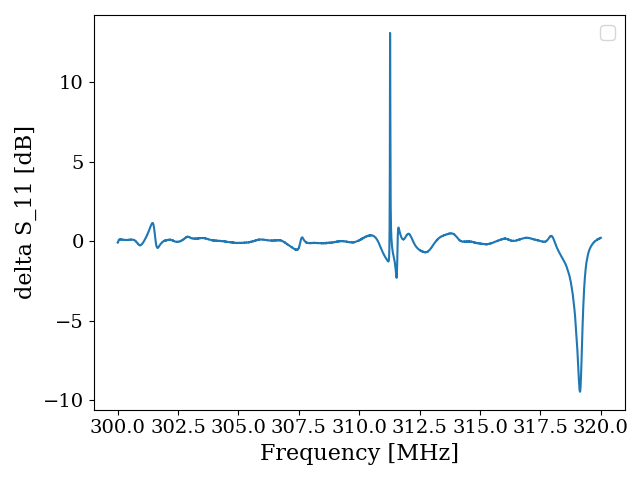

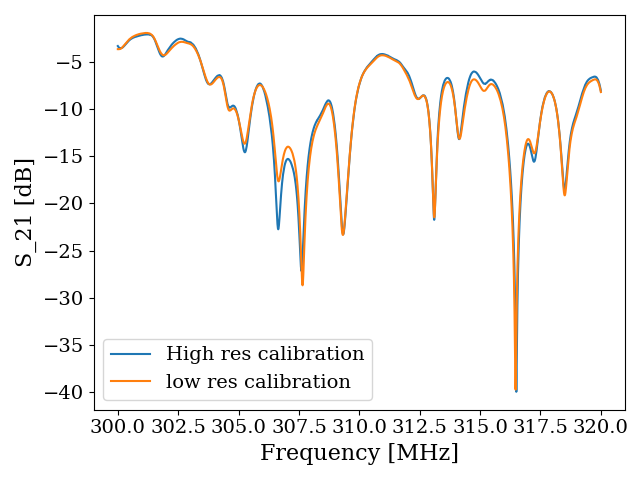

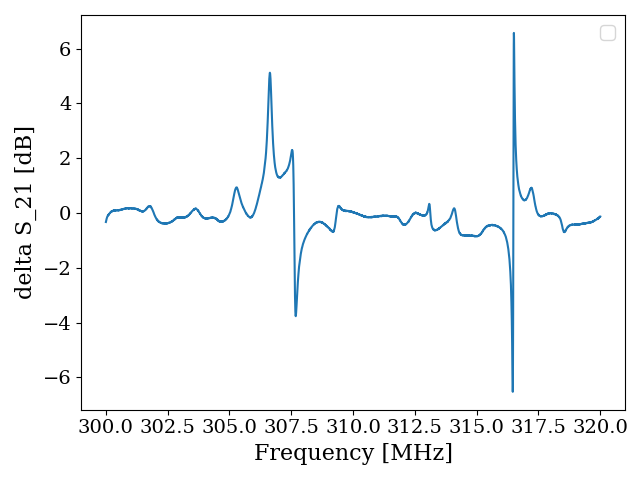

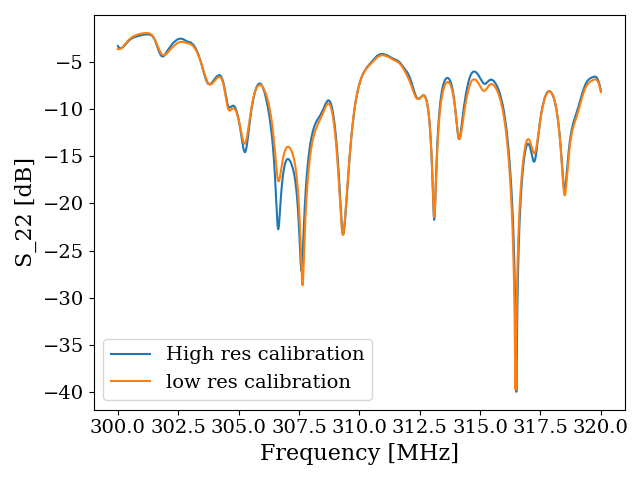

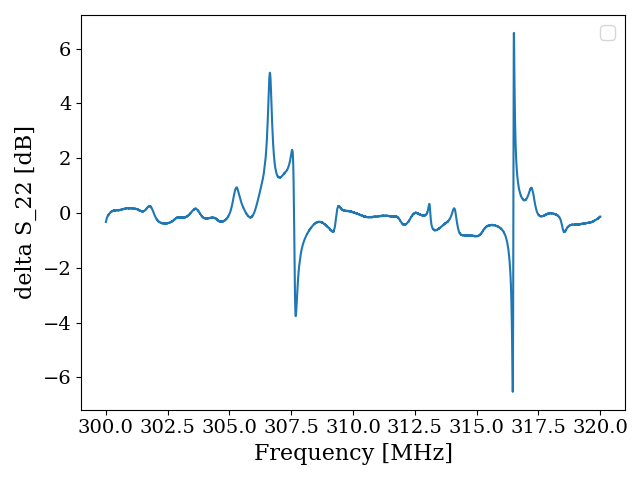

In [7]:
#S11
plt.figure()
plt.plot(freqs, 20*np.log10(np.absolute(s11_highResCal)), label = 'High res calibration')
plt.plot(freqsLR, 20*np.log10(np.absolute(s11_lowResCal)), label = 'low res calibration')
plt.xlabel('Frequency [MHz]')
plt.ylabel('S_11 [dB]')
plt.tight_layout()
plt.legend()

plt.figure()
plt.plot(freqs, 20*np.log10(np.absolute(s11_lowResCal))- 20*np.log10(np.absolute(s11_highResCal)))
plt.xlabel('Frequency [MHz]')
plt.ylabel('delta S_11 [dB]')
plt.tight_layout()
plt.legend()

# S21
plt.figure()
plt.plot(freqs, 20*np.log10(np.absolute(s21_highResCal)), label='High res calibration')
plt.plot(freqsLR, 20*np.log10(np.absolute(s21_lowResCal)), label='low res calibration')
plt.xlabel('Frequency [MHz]')
plt.ylabel('S_21 [dB]')
plt.tight_layout()
plt.legend()

plt.figure()
plt.plot(freqs, 20*np.log10(np.absolute(s21_lowResCal)) - 20*np.log10(np.absolute(s21_highResCal)))
plt.xlabel('Frequency [MHz]')
plt.ylabel('delta S_21 [dB]')
plt.tight_layout()
plt.legend()


# S22
plt.figure()
plt.plot(freqs, 20*np.log10(np.absolute(s22_highResCal)), label='High res calibration')
plt.plot(freqsLR, 20*np.log10(np.absolute(s22_lowResCal)), label='low res calibration')
plt.xlabel('Frequency [MHz]')
plt.ylabel('S_22 [dB]')
plt.tight_layout()
plt.legend()

plt.figure()
plt.plot(freqs, 20*np.log10(np.absolute(s22_lowResCal)) - 20*np.log10(np.absolute(s22_highResCal)))
plt.xlabel('Frequency [MHz]')
plt.ylabel('delta S_22 [dB]')
plt.tight_layout()
plt.legend()